In [28]:
import csv

import pandas as pd
import numpy as np
import sqlite3
import matplotlib

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [37]:
conn = sqlite3.connect('../db.sqlite3')
cur = conn.cursor()
cur.execute(
    "SELECT o.id as 'order_id', oi.quantity, p.name, p.price, o.datetime "
    "FROM restaurant_order as o "
    "JOIN restaurant_orderitem as oi ON o.id = oi.order_id "
    "JOIN restaurant_product as p ON p.id = oi.product_id "
)

with open("restaurant.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["id", "quantity", "name", "price", "date_time"])
    for row in cur.fetchall():
        writer.writerow(row)

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: ylabel='quantity'>

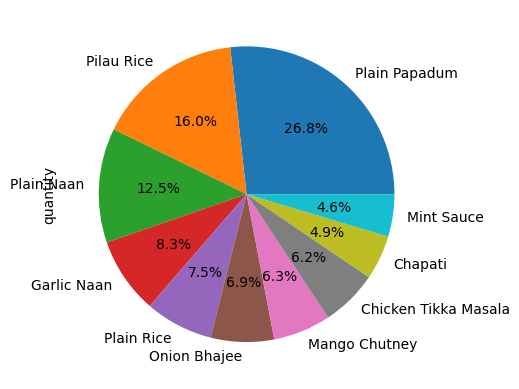

In [54]:
df = pd.read_csv("restaurant.csv")
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(10).plot(kind="pie", autopct='%1.1f%%')

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: ylabel='Item price'>

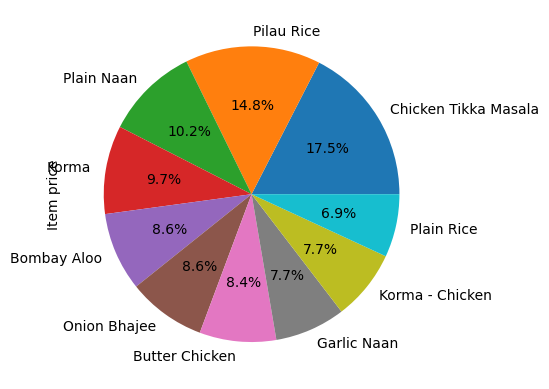

In [39]:
df["Item price"] = df["price"] * df["quantity"]
df.groupby("name")["Item price"].sum().sort_values(ascending=False).head(10).plot(kind="pie", autopct='%1.1f%%')


In [41]:
df

,id,quantity,name,price,date_time,Item price
0,1,2,Plain Papadum,0.80,2019-08-03 20:25:00,1.60
1,1,1,King Prawn Balti,12.95,2019-08-03 20:25:00,12.95
2,1,1,Garlic Naan,2.95,2019-08-03 20:25:00,2.95
3,1,1,Mushroom Rice,3.95,2019-08-03 20:25:00,3.95
4,1,1,Paneer Tikka Masala,8.95,2019-08-03 20:25:00,8.95
...,...,...,...,...,...,...
74813,3255,2,House Red wine 75cl,17.95,2016-05-18 18:53:00,35.90
74814,12905,2,House Red wine 75cl,17.95,2016-05-14 19:28:00,35.90
74815,3272,2,House Red wine 75cl,17.95,2016-05-10 13:18:00,35.90
74816,11404,1,House white wine 75cl,17.95,2016-04-07 19:04:00,17.95


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: xlabel='hour'>

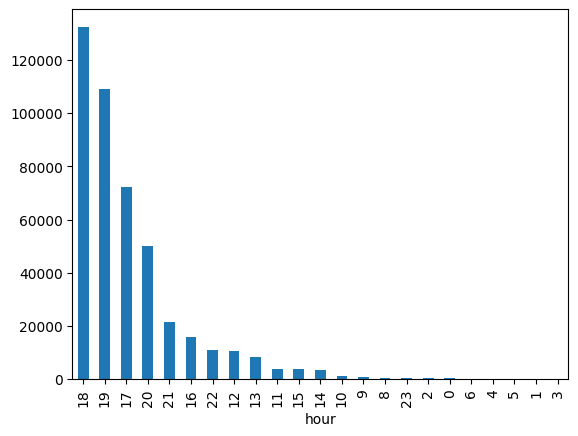

In [47]:
df["date_time"] = pd.to_datetime(df["date_time"])
df["hour"] = df["date_time"].dt.hour
df.groupby("hour")["Item price"].sum().sort_values(ascending=False).plot(kind="bar")

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<Axes: xlabel='day_of_the_week'>

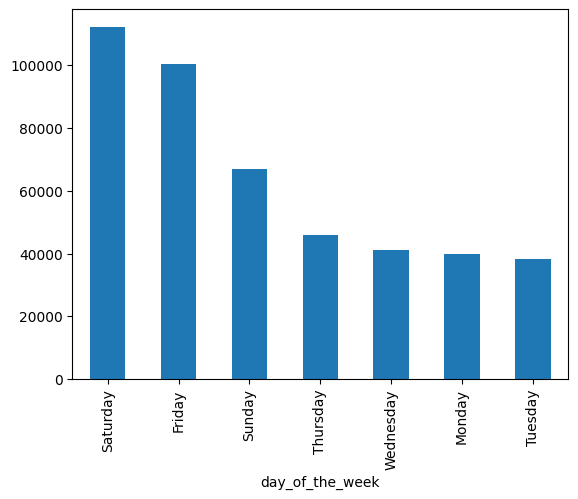

In [50]:
df["date_time"] = pd.to_datetime(df["date_time"])
df["day_of_the_week"] = df["date_time"].dt.day_name()
df.groupby("day_of_the_week")["Item price"].sum().sort_values(ascending=False).plot(kind="bar")